In [380]:
# On importe les librairies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Récupération des données

In [381]:
train_csv = pd.read_csv('D:/openclassroom/P7/application_train.csv')
train_csv.name = 'Train'
test_csv = pd.read_csv('D:/openclassroom/P7/application_test.csv')
test_csv.name = 'Test'
bureau_csv = pd.read_csv('D:/openclassroom/P7/bureau.csv')
bureau_csv.name = 'Bureau'
bureauB_csv = pd.read_csv('D:/openclassroom/P7/bureau_balance.csv')
bureauB_csv.name = 'Bur_Bal'
CCB_csv = pd.read_csv('D:/openclassroom/P7/credit_card_balance.csv')
CCB_csv.name = 'Cred_Card_Bal'
pay_csv = pd.read_csv('D:/openclassroom/P7/installments_payments.csv')
pay_csv.name = 'Pay'
PCB_csv = pd.read_csv('D:/openclassroom/P7/POS_CASH_balance.csv')
PCB_csv.name = 'Pos_Cash_Bal'
prev_csv = pd.read_csv('D:/openclassroom/P7/previous_application.csv')
prev_csv.name = 'Prev'
sample_csv = pd.read_csv('D:/openclassroom/P7/sample_submission.csv')
sample_csv.name = 'Sample'
LST_Dataset = [train_csv, test_csv, bureau_csv, bureauB_csv, CCB_csv, pay_csv, PCB_csv, prev_csv, sample_csv]

In [382]:
for datashape in LST_Dataset:
    print(datashape.name, datashape.shape)

Train (307511, 122)
Test (48744, 121)
Bureau (1716428, 17)
Bur_Bal (27299925, 3)
Cred_Card_Bal (3840312, 23)
Pay (13605401, 8)
Pos_Cash_Bal (10001358, 8)
Prev (1670214, 37)
Sample (48744, 2)


# Analyse des données Fichiers Train/Test

## recherche et suppression des données peu renseignées

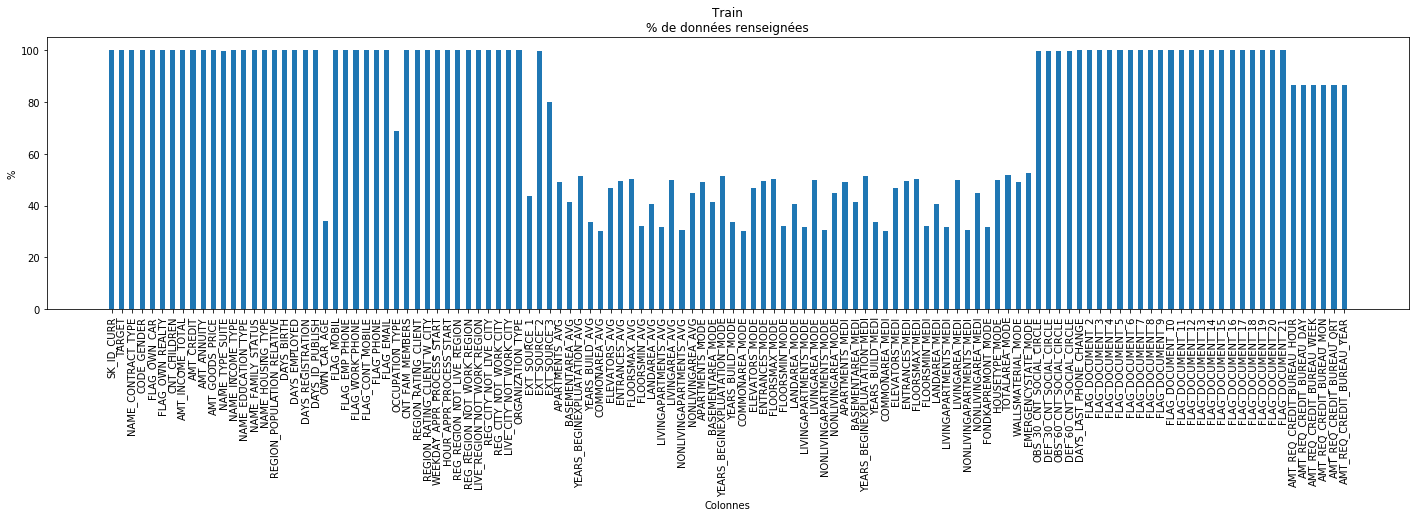

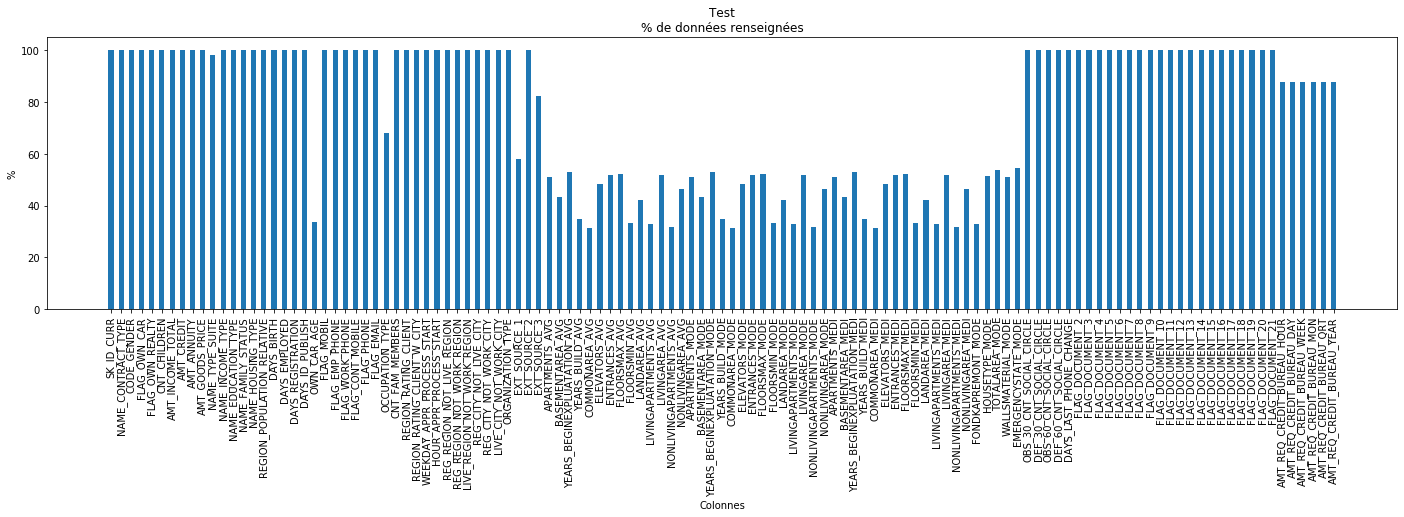

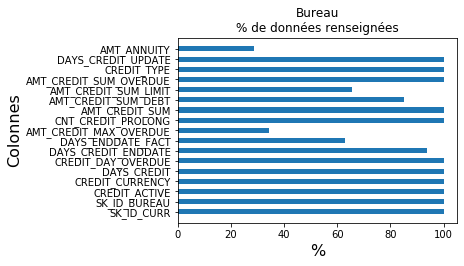

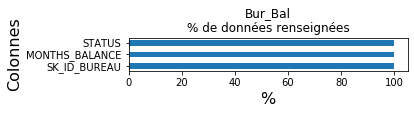

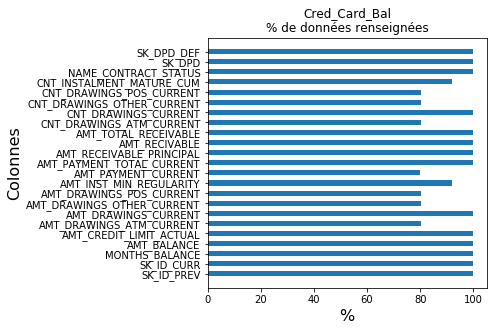

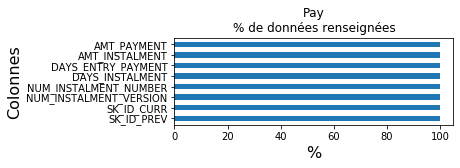

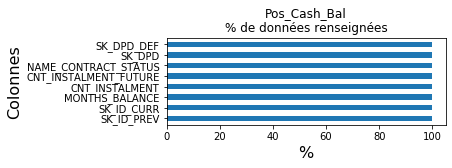

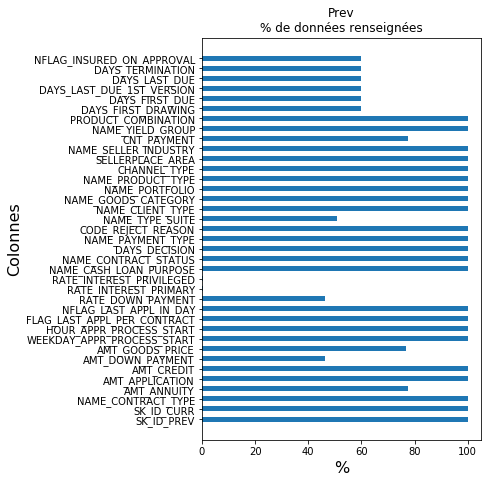

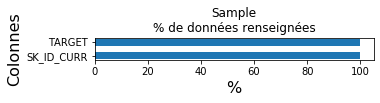

In [383]:
for datashape in LST_Dataset:
    # graphe colonnes renseignées 
    x = ((len(datashape)-datashape.isnull().sum()) / len(datashape)) * 100
    Barname = datashape.columns
    if len(datashape.columns)>40 :
        plt.figure(figsize=(len(datashape.columns)/5,5))
        plt.bar(Barname, x, 0.5)
        plt.ylabel('%')
        plt.xlabel('Colonnes')
        plt.xticks(rotation='vertical')
        
    else :
        plt.figure(figsize=(5,len(datashape.columns)/5))
        plt.barh(Barname, x, 0.5)
        plt.ylabel('Colonnes').set_fontsize(16)
        plt.xlabel('%').set_fontsize(16)
        plt.xticks(rotation='horizontal')
        
    plt.title(datashape.name+'\n% de données renseignées')
    plt.savefig('D:\openclassroom\P7\Vide_%s.jpg' %datashape.name, dpi=100, bbox_inches = "tight")

### Suppression des colonnes non pertinentes

In [384]:
Col_Suppr = "FLAG_DOCUMENT_"
for numcol in range(2,22):
    namecol = Col_Suppr+str(numcol)
    train_csv.drop(namecol,axis=1,inplace=True)
    test_csv.drop(namecol,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(307511, 102)
(48744, 101)


In [385]:
List_Col_Appart = ['APARTMENTS', 'BASEMENTAREA', 'YEARS_BEGINEXPLUATATION', 'YEARS_BUILD', 'COMMONAREA',
             'ELEVATORS', 'ENTRANCES', 'FLOORSMAX', 'FLOORSMIN', 'LANDAREA', 'LIVINGAPARTMENTS', 'LIVINGAREA',
             'NONLIVINGAPARTMENTS', 'NONLIVINGAREA']
Liste_Suffix = ['_AVG', '_MODE', '_MEDI']
for col in List_Col_Appart:
    for suff in Liste_Suffix:
        train_csv.drop(col+suff,axis=1,inplace=True)
        test_csv.drop(col+suff,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(307511, 60)
(48744, 59)


In [386]:
print(train_csv.nunique()) 

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OWN_CAR_AGE                        62
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE  

In [387]:
Liste_barplot = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
                 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'OCCUPATION_TYPE']

for col in Liste_barplot :
    print(train_csv[col].value_counts())


0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Mate

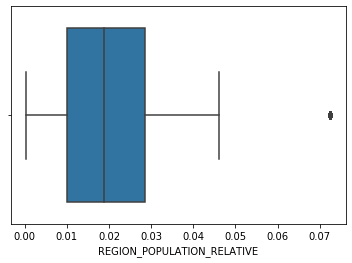

In [388]:
plt.figure()
sns.boxplot(x=train_csv.REGION_POPULATION_RELATIVE, data=train_csv)
plt.savefig('D:\openclassroom\P7\BoxPlt_region.jpg' ,dpi=100,bbox_inches = "tight")

In [389]:
train_csv.drop(train_csv[(train_csv.REGION_POPULATION_RELATIVE>0.05)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.REGION_POPULATION_RELATIVE>0.05)].index,inplace=True)

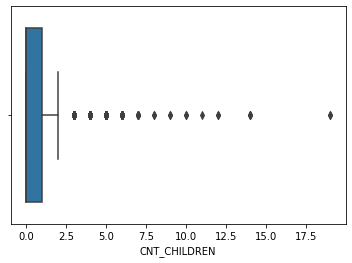

In [390]:
plt.figure()
sns.boxplot(x=train_csv.CNT_CHILDREN, data=train_csv)
plt.savefig('D:\openclassroom\P7\BoxPlt_child.jpg' ,dpi=100,bbox_inches = "tight")

In [391]:
train_csv.drop(train_csv[(train_csv.CNT_CHILDREN>3)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.CNT_CHILDREN>3)].index,inplace=True)

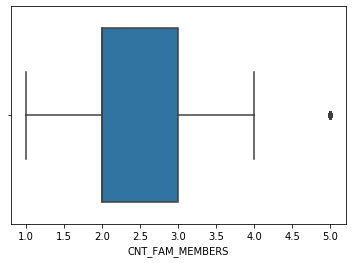

In [392]:
plt.figure()
sns.boxplot(x=train_csv.CNT_FAM_MEMBERS, data=train_csv)
plt.savefig('D:\openclassroom\P7\BoxPlt_fam.jpg' ,dpi=100,bbox_inches = "tight")

In [393]:
train_csv.drop(train_csv[(train_csv.CNT_FAM_MEMBERS>5)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.CNT_FAM_MEMBERS>5)].index,inplace=True)

## Etude des différents Montants lié au Crédit

In [394]:
Liste_Montant = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' ]
for amt in Liste_Montant :
    print(train_csv[amt].describe())

count    2.985590e+05
mean     1.656576e+05
std      2.383995e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
count    2.985590e+05
mean     5.926022e+05
std      3.969270e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.084955e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
count    298548.000000
mean      26818.079329
std       14206.738970
min        1615.500000
25%       16443.000000
50%       24705.000000
75%       34209.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
count    2.982870e+05
mean     5.326205e+05
std      3.644801e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


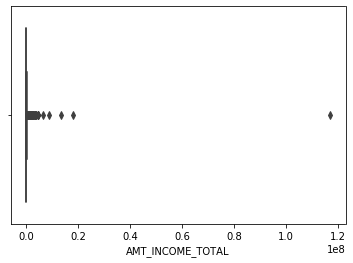

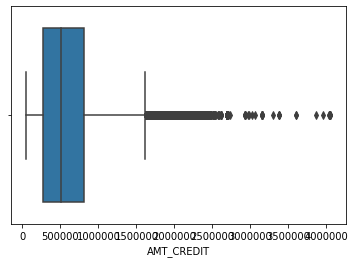

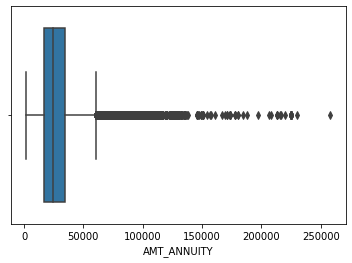

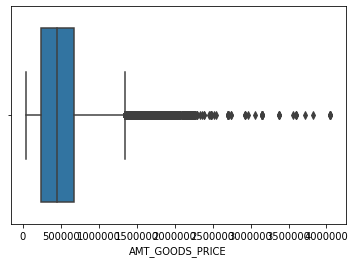

In [395]:
for amt in Liste_Montant :
    plt.figure()
    sns.boxplot(x=amt, data=train_csv)
    plt.savefig('D:\openclassroom\P7\BoxPlt_%s.jpg' %amt,dpi=100,bbox_inches = "tight")

### On enlève les outliers

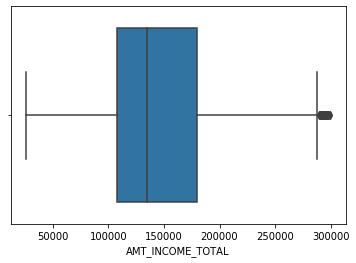

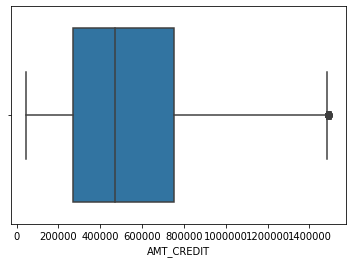

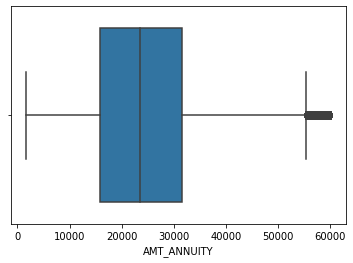

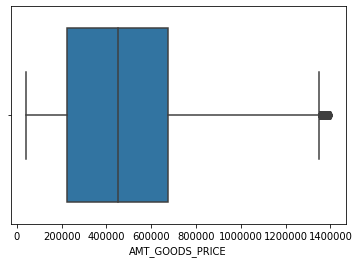

In [396]:
# on ajuste pour enlever les outliers
train_csv.drop(train_csv[(train_csv.AMT_INCOME_TOTAL>300000)].index,inplace=True)
train_csv.drop(train_csv[(train_csv.AMT_ANNUITY>60000)].index,inplace=True)
train_csv.drop(train_csv[(train_csv.AMT_GOODS_PRICE>1400000)].index,inplace=True)
train_csv.drop(train_csv[(train_csv.AMT_CREDIT>1500000)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.AMT_INCOME_TOTAL>300000)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.AMT_ANNUITY>60000)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.AMT_GOODS_PRICE>1400000)].index,inplace=True)
test_csv.drop(test_csv[(test_csv.AMT_CREDIT>1500000)].index,inplace=True)
for amt in Liste_Montant :
    plt.figure()
    sns.boxplot(x=amt, data=train_csv)
    plt.savefig('D:\openclassroom\P7\BoxPlt2_%s.jpg' %amt,dpi=100,bbox_inches = "tight")

In [397]:
print(train_csv.AMT_ANNUITY.isnull().sum())
print(test_csv.AMT_ANNUITY.isnull().sum())
print(train_csv.AMT_INCOME_TOTAL.isnull().sum())
print(test_csv.AMT_INCOME_TOTAL.isnull().sum())

10
19
0
0


In [398]:
print(train_csv.shape)    
print(test_csv.shape) 
train_csv.drop(train_csv[(train_csv.AMT_ANNUITY.isnull())].index,inplace=True)
test_csv.drop(test_csv[(test_csv.AMT_ANNUITY.isnull())].index,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(268726, 60)
(41726, 59)
(268716, 60)
(41707, 59)


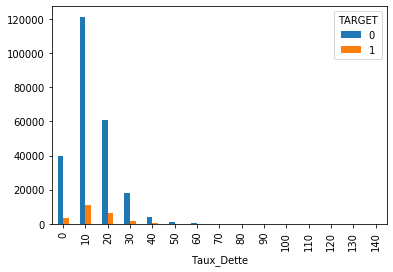

In [399]:
# on pourra ajouter une variable sur le taux d'endettement AMT_ANNUITY/AMT_INCOME_TOTAL
train_csv['Taux_Dette'] = (train_csv.AMT_ANNUITY/train_csv.AMT_INCOME_TOTAL*10).astype(int)*10
test_csv['Taux_Dette'] = (test_csv.AMT_ANNUITY/test_csv.AMT_INCOME_TOTAL*10).astype(int)*10
train_csv.groupby('TARGET').Taux_Dette.value_counts().unstack(0).plot.bar().get_figure().savefig('D://openclassroom//P7//bar_dettes.jpg',dpi=100,bbox_inches = "tight")

## Etude sur les champs Date

In [400]:
Liste_date = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for date in Liste_date :
    print(train_csv[date].describe())

count    268716.000000
mean     -16039.902179
std        4430.018245
min      -25201.000000
25%      -19775.000000
50%      -15743.000000
75%      -12317.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64
count    268716.000000
mean      67089.376837
std      143906.212707
min      -17912.000000
25%       -2687.000000
50%       -1163.000000
75%        -256.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
count    268716.000000
mean      -5013.028979
std        3526.455404
min      -24672.000000
25%       -7514.000000
50%       -4523.000000
75%       -2051.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64
count    268716.000000
mean      -2997.303979
std        1505.588457
min       -7197.000000
25%       -4298.000000
50%       -3261.000000
75%       -1726.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


In [401]:
# on pourra ajouter une variable sur les tranches d'age

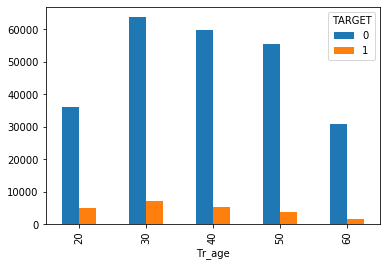

In [402]:
train_csv['Tr_age'] = (train_csv.DAYS_BIRTH /3650).astype(int)*(-10)
test_csv['Tr_age'] = (test_csv.DAYS_BIRTH /3650).astype(int)*(-10)
train_csv.groupby('TARGET').Tr_age.value_counts().unstack(0).plot.bar().get_figure().savefig('D://openclassroom//P7//bar_age.jpg',dpi=100,bbox_inches = "tight")


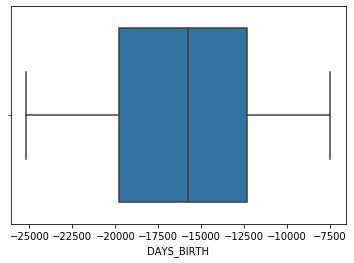

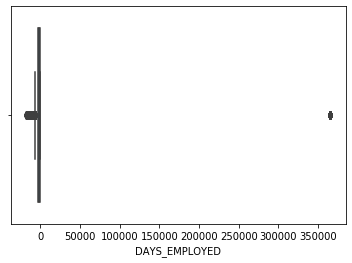

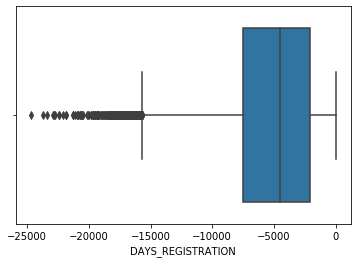

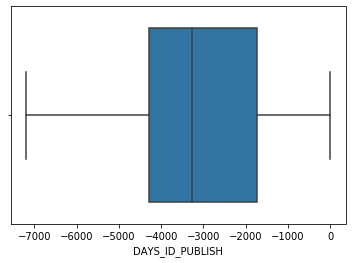

In [403]:
for date in Liste_date :
    plt.figure()
    sns.boxplot(x=date, data=train_csv)
    plt.savefig('D:\openclassroom\P7\BoxPlt_%s.jpg' %date,dpi=100,bbox_inches = "tight")

### On enlève les outliers

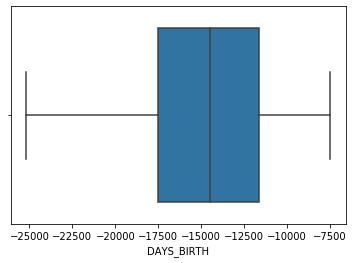

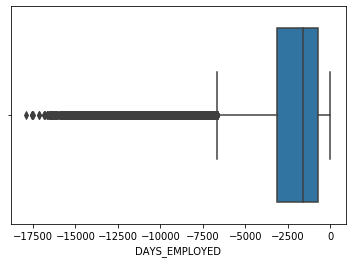

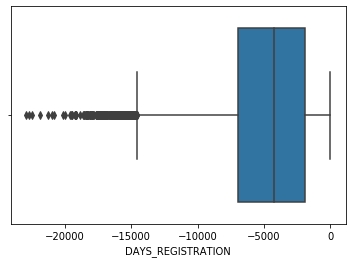

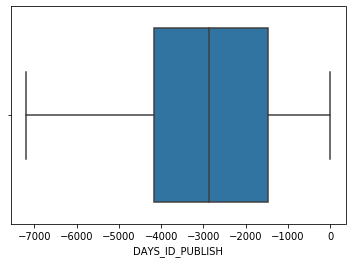

In [404]:
train_csv.drop(train_csv[(train_csv.DAYS_EMPLOYED>350000)].index,inplace=True) 
test_csv.drop(test_csv[(test_csv.DAYS_EMPLOYED>350000)].index,inplace=True) 
# je les supprime car on a un jeux de donnée important, sinon on aurai pu les remplacer par une moyenne des jours travaillés
for date in Liste_date :
    plt.figure()
    sns.boxplot(x=date, data=train_csv)
    plt.savefig('D:\openclassroom\P7\BoxPlt2_%s.jpg' %date,dpi=100,bbox_inches = "tight")

In [405]:
# il y a une cohérence entre les valeurs extreme de date de naissance et de temps travaillé

## Age de la voiture

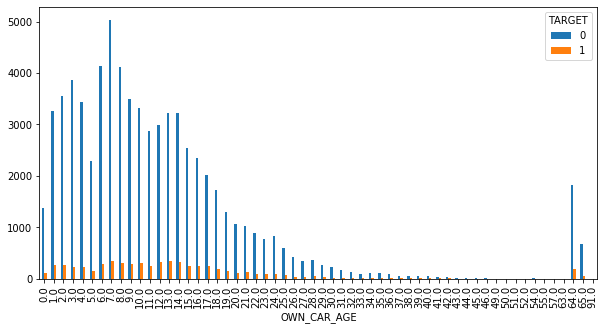

In [406]:
train_csv.groupby('TARGET').OWN_CAR_AGE.value_counts().unstack(0).plot.bar(figsize=(10,5)).get_figure().savefig('D:\openclassroom\P7\car_age.jpg',dpi=100,bbox_inches = "tight")


## Etude des Flag

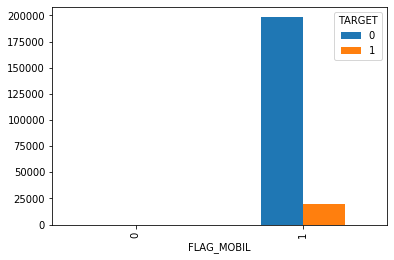

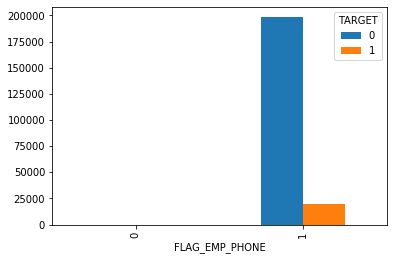

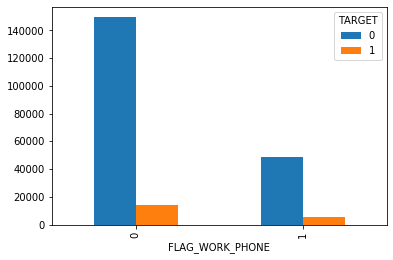

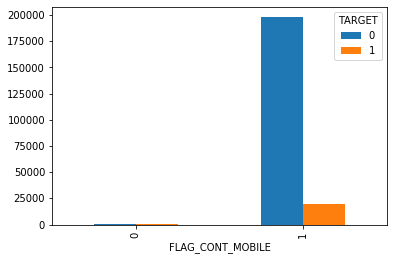

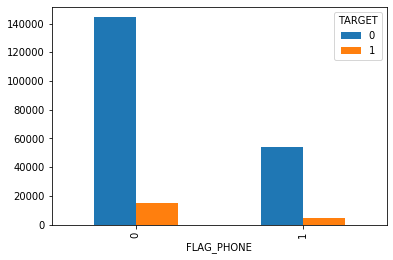

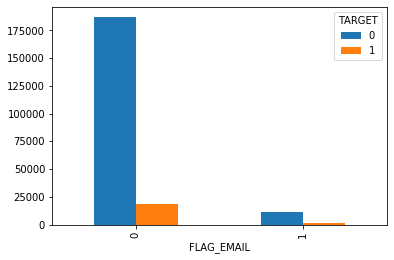

In [407]:
Liste_flag = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']
for flag in Liste_flag :
    train_csv.groupby('TARGET')[flag].value_counts().unstack(0).plot.bar().get_figure().savefig('D:\openclassroom\P7\Flag_%s.jpg' %flag,dpi=100,bbox_inches = "tight")

In [408]:
# variables non pertinentes, on les supprime...
for flag in Liste_flag :
    train_csv.drop(flag,axis=1,inplace=True)
    test_csv.drop(flag,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 56)
(33205, 55)


## Jour et Heure de signature du prét

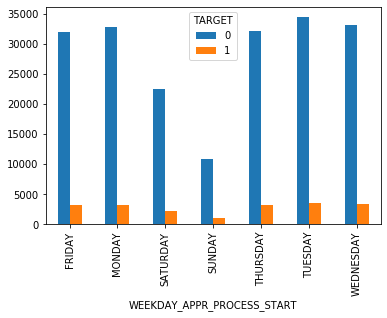

In [409]:
train_csv.groupby('TARGET')['WEEKDAY_APPR_PROCESS_START'].value_counts().unstack(0).plot.bar().get_figure().savefig('D:\openclassroom\P7\Day.jpg' ,dpi=100,bbox_inches = "tight")

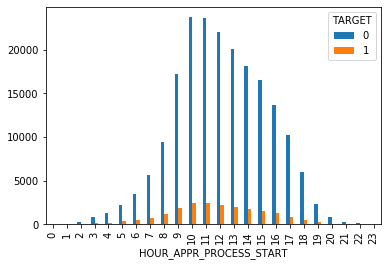

In [410]:
train_csv.groupby('TARGET')['HOUR_APPR_PROCESS_START'].value_counts().unstack(0).plot.bar().get_figure().savefig('D:\openclassroom\P7\heure.jpg' ,dpi=100,bbox_inches = "tight")


In [411]:
# variables non pertinentes, on les supprime...
train_csv.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
test_csv.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
train_csv.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
test_csv.drop('HOUR_APPR_PROCESS_START',axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 54)
(33205, 53)


## Type d'employeur

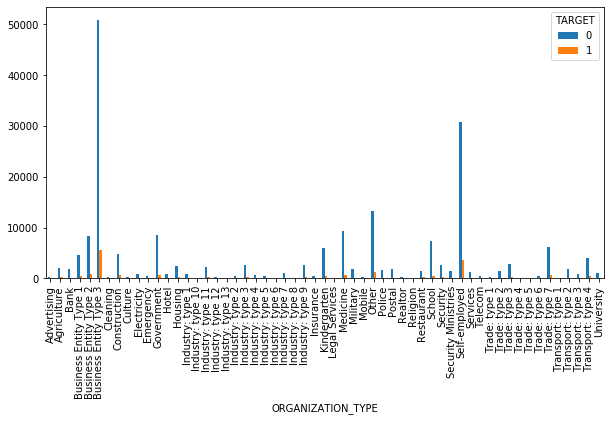

In [412]:
train_csv.groupby('TARGET')['ORGANIZATION_TYPE'].value_counts().unstack(0).plot.bar(figsize=(10,5)).get_figure().savefig('D://openclassroom//P7//type_orga.jpg' ,dpi=100,bbox_inches = "tight")

## Etude des scores Externes

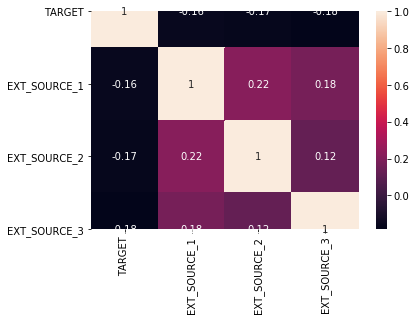

In [413]:
Ext_Corr = train_csv[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()
sns.heatmap(Ext_Corr, annot = True)

In [414]:
Liste_NormInfo = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
train_csv[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']].head()


,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,reg oper account,block of flats,0.0149,"Stone, brick",No
1,reg oper account,block of flats,0.0714,Block,No
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [415]:
for norm in Liste_NormInfo:
    print(train_csv[norm].value_counts(dropna=False))

NaN                      152751
reg oper account          49245
reg oper spec account      8354
not specified              3926
org spec account           3677
Name: FONDKAPREMONT_MODE, dtype: int64
NaN                 113549
block of flats      102316
specific housing      1222
terraced house         866
Name: HOUSETYPE_MODE, dtype: int64
NaN       109407
0.0000       454
0.0570       174
0.0550       159
0.0064       159
           ...  
0.7104         1
0.3730         1
0.4319         1
0.4890         1
0.6559         1
Name: TOTALAREA_MODE, Length: 4598, dtype: int64
NaN             115007
Stone, brick     45771
Panel            43688
Block             5781
Wooden            3996
Mixed             1589
Others            1131
Monolithic         990
Name: WALLSMATERIAL_MODE, dtype: int64
No     108730
NaN    107465
Yes      1758
Name: EMERGENCYSTATE_MODE, dtype: int64


In [416]:
# variables non pertinentes, on les supprime...
for norm in Liste_NormInfo:
    train_csv.drop(norm,axis=1,inplace=True)
    test_csv.drop(norm,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 49)
(33205, 48)


In [417]:
List_Obs = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
train_csv[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


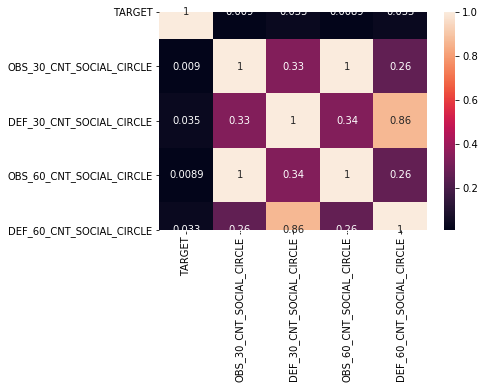

In [418]:
Obs_Corr = train_csv[['TARGET', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].corr()
sns.heatmap(Obs_Corr, annot = True)

In [419]:
for obs in List_Obs:
    train_csv.drop(obs,axis=1,inplace=True)
    test_csv.drop(obs,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 45)
(33205, 44)


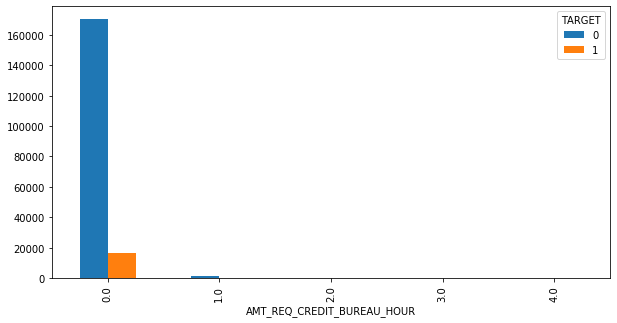

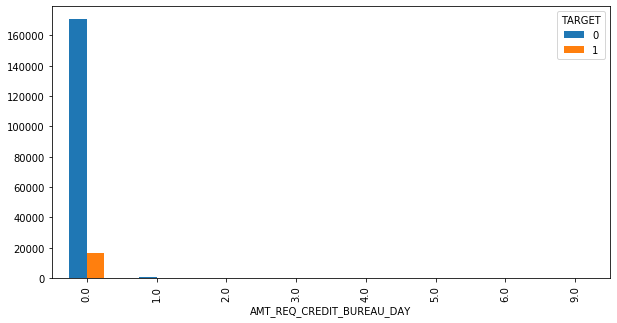

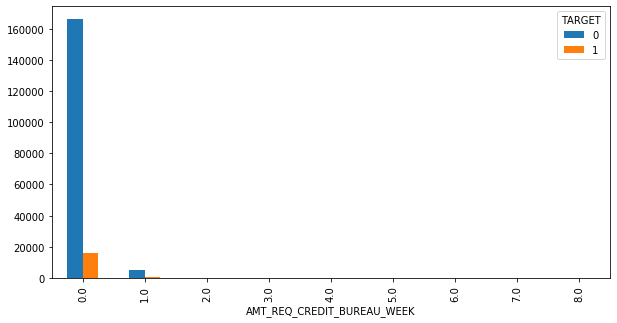

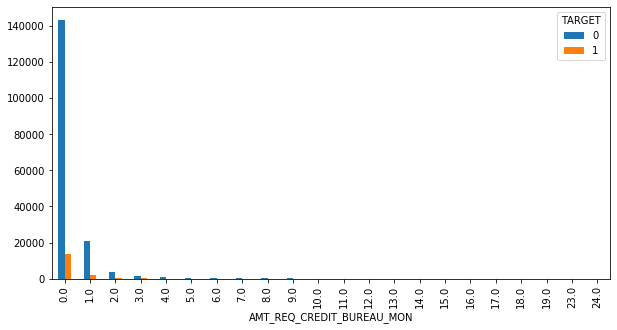

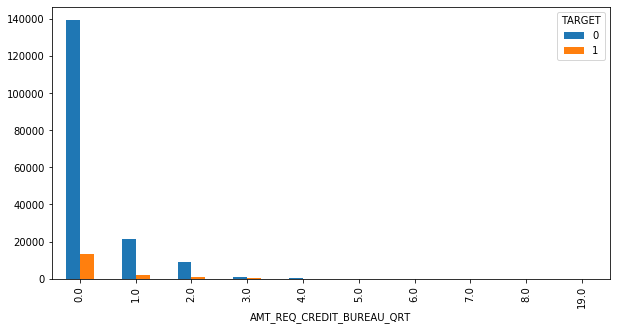

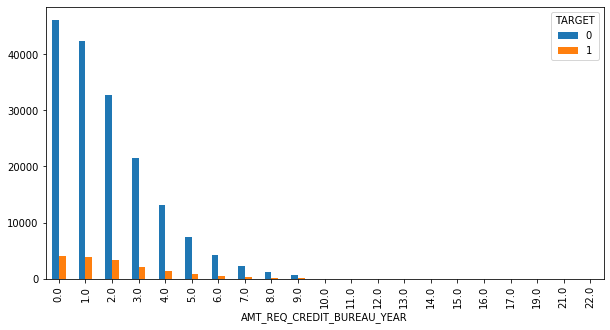

In [420]:
Liste_Req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for req in Liste_Req :
    train_csv.groupby('TARGET')[req].value_counts().unstack(0).plot.bar(figsize=(10,5)).get_figure().savefig('D://openclassroom//P7//Req_%s.jpg' %req ,dpi=100,bbox_inches = "tight")

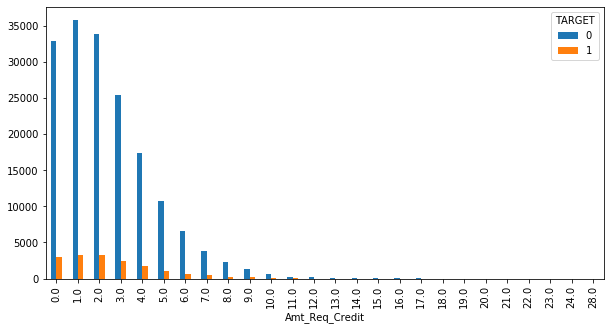

In [421]:
# on cumul les demandes dans une seul colonnes
train_csv['Amt_Req_Credit'] = (train_csv.AMT_REQ_CREDIT_BUREAU_HOUR+train_csv.AMT_REQ_CREDIT_BUREAU_DAY+train_csv.AMT_REQ_CREDIT_BUREAU_WEEK+
                              train_csv.AMT_REQ_CREDIT_BUREAU_MON+train_csv.AMT_REQ_CREDIT_BUREAU_QRT+train_csv.AMT_REQ_CREDIT_BUREAU_YEAR)
test_csv['Amt_Req_Credit'] = (test_csv.AMT_REQ_CREDIT_BUREAU_HOUR+test_csv.AMT_REQ_CREDIT_BUREAU_DAY+test_csv.AMT_REQ_CREDIT_BUREAU_WEEK+
                              test_csv.AMT_REQ_CREDIT_BUREAU_MON+test_csv.AMT_REQ_CREDIT_BUREAU_QRT+test_csv.AMT_REQ_CREDIT_BUREAU_YEAR)
train_csv.groupby('TARGET')['Amt_Req_Credit'].value_counts().unstack(0).plot.bar(figsize=(10,5)).get_figure().savefig('D://openclassroom//P7//Amt_Req.jpg', dpi=100,bbox_inches = "tight")    

In [422]:
for req in Liste_Req :
    train_csv.drop(req,axis=1,inplace=True)
    test_csv.drop(req,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 40)
(33205, 39)


In [423]:
Liste_suppr = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE',
               'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']

In [424]:
for suppr in Liste_suppr:
    train_csv.drop(suppr,axis=1,inplace=True)
    test_csv.drop(suppr,axis=1,inplace=True)
print(train_csv.shape)    
print(test_csv.shape) 

(217953, 27)
(33205, 26)


# Préparation des données

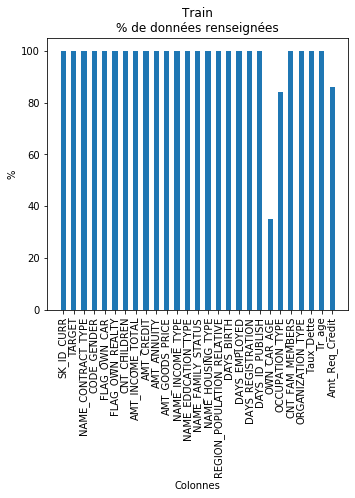

In [425]:
x = ((len(train_csv)-train_csv.isnull().sum()) / len(train_csv)) * 100
Barname = train_csv.columns
plt.figure(figsize=(len(train_csv.columns)/5,5))
plt.bar(Barname, x, 0.5)
plt.ylabel('%')
plt.xlabel('Colonnes')
plt.xticks(rotation='vertical')
plt.title(train_csv.name+'\n% de données renseignées')
plt.savefig('D:\openclassroom\P7\Vide1_%s.jpg' %train_csv.name, dpi=100, bbox_inches = "tight")


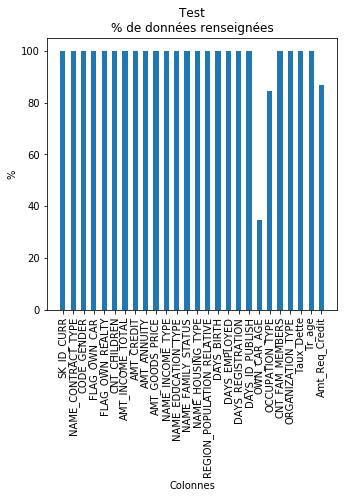

In [426]:
x = ((len(test_csv)-test_csv.isnull().sum()) / len(test_csv)) * 100
Barname = test_csv.columns
plt.figure(figsize=(len(test_csv.columns)/5,5))
plt.bar(Barname, x, 0.5)
plt.ylabel('%')
plt.xlabel('Colonnes')
plt.xticks(rotation='vertical')
plt.title(test_csv.name+'\n% de données renseignées')
plt.savefig('D:\openclassroom\P7\Vide1_%s.jpg' %test_csv.name, dpi=100, bbox_inches = "tight")

### On supprime les données faiblement renseignées

In [427]:
x = ((len(train_csv)-train_csv.isnull().sum()) / len(train_csv)) * 100
train_csv.drop(train_csv.loc[:,x<50],axis=1,inplace=True)
x = ((len(test_csv)-test_csv.isnull().sum()) / len(test_csv)) * 100
test_csv.drop(test_csv.loc[:,x<50],axis=1,inplace=True)

### On remplace les "nan" par une valeur appropiée

In [428]:
train_csv.OCCUPATION_TYPE.value_counts(dropna=False)

Laborers                 50221
NaN                      34960
Sales staff              29436
Core staff               23629
Drivers                  16096
Managers                 13984
High skill tech staff     9543
Accountants               7837
Medicine staff            7831
Security staff            6255
Cooking staff             5612
Cleaning staff            4419
Private service staff     2225
Low-skill Laborers        2030
Waiters/barmen staff      1262
Secretaries               1139
Realty agents              632
HR staff                   446
IT staff                   396
Name: OCCUPATION_TYPE, dtype: int64

In [429]:
train_csv.OCCUPATION_TYPE.fillna('Undefine', inplace=True)
test_csv.OCCUPATION_TYPE.fillna('Undefine', inplace=True)
train_csv.OCCUPATION_TYPE.value_counts(dropna=False)

Laborers                 50221
Undefine                 34960
Sales staff              29436
Core staff               23629
Drivers                  16096
Managers                 13984
High skill tech staff     9543
Accountants               7837
Medicine staff            7831
Security staff            6255
Cooking staff             5612
Cleaning staff            4419
Private service staff     2225
Low-skill Laborers        2030
Waiters/barmen staff      1262
Secretaries               1139
Realty agents              632
HR staff                   446
IT staff                   396
Name: OCCUPATION_TYPE, dtype: int64

In [430]:
train_csv.groupby('TARGET')['Amt_Req_Credit'].value_counts(dropna=False)

TARGET  Amt_Req_Credit
0       1.0               35796
        2.0               33864
        0.0               32842
        NaN               26605
        3.0               25412
        4.0               17356
        5.0               10751
        6.0                6612
        7.0                3817
        8.0                2284
        9.0                1323
        10.0                624
        11.0                267
        12.0                169
        13.0                105
        14.0                 77
        15.0                 58
        16.0                 31
        17.0                 22
        18.0                 19
        19.0                 11
        20.0                  8
        21.0                  5
        23.0                  3
        22.0                  2
        24.0                  1
        28.0                  1
1       NaN                3489
        1.0                3237
        2.0                3214
        0.0      

In [431]:
train_csv.Amt_Req_Credit.fillna(0, inplace=True)
test_csv.Amt_Req_Credit.fillna(0, inplace=True)

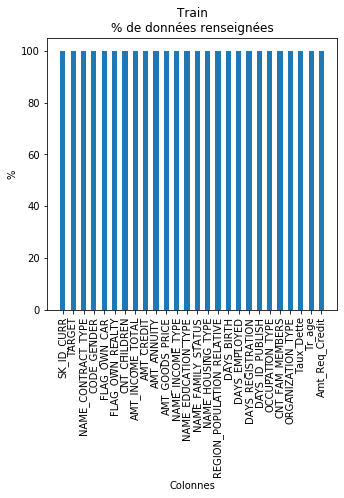

In [432]:
x = ((len(train_csv)-train_csv.isnull().sum()) / len(train_csv)) * 100
Barname = train_csv.columns
plt.figure(figsize=(len(train_csv.columns)/5,5))
plt.bar(Barname, x, 0.5)
plt.ylabel('%')
plt.xlabel('Colonnes')
plt.xticks(rotation='vertical')
plt.title(train_csv.name+'\n% de données renseignées')
plt.savefig('D:\openclassroom\P7\Vide2_%s.jpg' %train_csv.name, dpi=100, bbox_inches = "tight")


In [433]:
train_csv.isna().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE               241
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 1
ORGANIZATION_TYPE               0
Taux_Dette                      0
Tr_age                          0
Amt_Req_Credit                  0
dtype: int64

In [434]:
train_csv.CNT_FAM_MEMBERS.fillna(0, inplace=True)
test_csv.CNT_FAM_MEMBERS.fillna(0, inplace=True)

In [435]:
train_csv.AMT_GOODS_PRICE.fillna(train_csv.AMT_GOODS_PRICE.mean(), inplace=True)
test_csv.AMT_GOODS_PRICE.fillna(train_csv.AMT_GOODS_PRICE.mean(), inplace=True)

In [436]:
train_csv.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
ORGANIZATION_TYPE             0
Taux_Dette                    0
Tr_age                        0
Amt_Req_Credit                0
dtype: int64

In [437]:
train_csv.shape

(217953, 26)

In [438]:
train_csv.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,Taux_Dette,Tr_age,Amt_Req_Credit
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-9461,-637,-3648.0,-2120,Laborers,1.0,Business Entity Type 3,10,20,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-16765,-1188,-1186.0,-291,Core staff,2.0,School,10,40,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-19046,-225,-4260.0,-2531,Laborers,1.0,Government,10,50,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-19005,-3039,-9833.0,-2437,Laborers,2.0,Business Entity Type 3,20,50,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-19932,-3038,-4311.0,-3458,Core staff,1.0,Religion,10,50,0.0


## On prépare les Données

In [439]:
train_csv.DAYS_BIRTH = train_csv.DAYS_BIRTH*(-1)
train_csv.DAYS_EMPLOYED = train_csv.DAYS_EMPLOYED*(-1)
train_csv.DAYS_REGISTRATION = train_csv.DAYS_REGISTRATION*(-1)
train_csv.DAYS_ID_PUBLISH = train_csv.DAYS_ID_PUBLISH*(-1)
test_csv.DAYS_BIRTH = test_csv.DAYS_BIRTH*(-1)
test_csv.DAYS_EMPLOYED = test_csv.DAYS_EMPLOYED*(-1)
test_csv.DAYS_REGISTRATION = test_csv.DAYS_REGISTRATION*(-1)
test_csv.DAYS_ID_PUBLISH = test_csv.DAYS_ID_PUBLISH*(-1)
train_csv = train_csv.reset_index(drop = True)
test_csv = test_csv.reset_index(drop = True)

In [442]:
Liste_std = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
             'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 
             'Taux_Dette', 'Tr_age', 'Amt_Req_Credit']
Df_Std = train_csv[Liste_std].copy()
Df_StdT = test_csv[Liste_std].copy()

Liste_OneHot = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
Df_One = train_csv[Liste_OneHot].copy()
Df_OneT = test_csv[Liste_OneHot].copy()

In [443]:
# standardisation
print("Base Train",train_csv.shape)    
print("Base Test",test_csv.shape) 

std_scale = StandardScaler().fit(Df_Std)

train_csv_predStd = std_scale.transform(Df_Std)
Df_train_csv_predStd = pd.DataFrame(train_csv_predStd, columns = [Liste_std])
#Df_train_csv_predStd['SK_ID_CURR'] = train_csv['SK_ID_CURR'].copy()

test_csv_predStd = std_scale.transform(Df_StdT)
Df_test_csv_predStd = pd.DataFrame(test_csv_predStd, columns = [Liste_std])
#Df_test_csv_predStd['SK_ID_CURR'] = train_csv['SK_ID_CURR'].copy()
print("Std Train",Df_train_csv_predStd.shape)    
print("Std Test",Df_test_csv_predStd.shape) 

# OneHote encoding

train_csv_oneh = pd.get_dummies(Df_One)
Df_train_csv_oneh = pd.DataFrame(train_csv_oneh)

test_csv_oneh = pd.get_dummies(Df_OneT)
Df_test_csv_oneh = pd.DataFrame(test_csv_oneh)

print("One Train",Df_train_csv_oneh.shape)    
print("One Test",Df_test_csv_oneh.shape) 
   

Base Train (217953, 26)
Base Test (33205, 25)
Std Train (217953, 14)
Std Test (33205, 14)
One Train (217953, 109)
One Test (33205, 104)


In [444]:
train_X = pd.merge(Df_train_csv_predStd, Df_train_csv_oneh, left_index = True, right_index = True)
train_Y = train_csv[['TARGET']].copy()

test_X = pd.merge(Df_test_csv_predStd, Df_test_csv_oneh, left_index = True, right_index = True)
print(train_X.shape)    
print(train_Y.shape) 

(217953, 123)
(217953, 1)


# Scoring avec Regression Logistique

## Test sur l'ensemble des données d'entrainement

In [473]:
LR = LogisticRegression().fit(train_X, train_Y.values.ravel())


C:\Appli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [474]:
LR.score(train_X, train_Y)

0.908750969245663

## Test avec un échantillon de données ajusté

In [475]:
Df_Tot = pd.merge(train_X, train_Y, left_index = True, right_index = True)
Df_Tot1 = Df_Tot[(Df_Tot.TARGET)==1]
Df_Tot0 = Df_Tot[(Df_Tot.TARGET)==0]
print(Df_Tot1.shape, Df_Tot0.shape)

(19888, 124) (198065, 124)


### On prends autant de TARGET=0 que de TARGET=1

In [476]:
Df_0 = Df_Tot0.sample(len(Df_Tot1))
print(Df_0.shape)

(19888, 124)


In [477]:
Df_01 = pd.concat([Df_0, Df_Tot1])
print(Df_01.shape)

(39776, 124)


In [478]:
Y = Df_01.TARGET.copy()
X = Df_01.drop('TARGET',axis=1)
LR1 = LogisticRegression().fit(X, Y)
LR1.score(X, Y)

C:\Appli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.62298873692679